In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import mlflow
import mlflow.tensorflow
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random
import os

In [9]:
# Load data
file_path = '../data/preprocessed/KbyS_mean.xlsx'
df = pd.read_excel('../data/preprocessed/KbyS_mean2.xlsx', header=[1], index_col=0)
df = df.drop(df.index[0])
#df = df.loc[86:125]
df.head()
#df = pd.read_excel(file_path)
#df = df.dropna()

,MeasurementID,file_name,Band 369 in [nm],Band 373 in [nm],Band 380 in [nm],Band 387 in [nm],Band 394 in [nm],Band 401 in [nm],Band 408 in [nm],Band 415 in [nm],...,Band 1065 in [nm],Band 1072 in [nm],Band 1079 in [nm],Band 1086 in [nm],Band 1092 in [nm],Band 1099 in [nm],Band 1106 in [nm],Luminance L,Green-Red a,Yellow-Blue b
2,2,Blue1-Config2,0.019903,0.159579,0.115394,0.170298,0.318770,0.209306,0.261873,0.297867,...,0.075672,0.070522,0.065766,0.061421,0.058067,0.056679,0.059887,64.319632,336.777247,137.770369
3,3,Blue1-Config3,0.240029,0.169391,0.133075,0.182070,0.171125,0.156488,0.233752,0.297171,...,0.081871,0.076845,0.072016,0.067724,0.064398,0.062817,0.068647,64.401863,335.606189,137.910723
4,4,Blue1-Config4,0.311088,0.187652,0.363048,0.087596,0.171145,0.195484,0.349500,0.297346,...,0.080916,0.075995,0.071466,0.067464,0.064358,0.063149,0.068671,64.730821,333.526857,138.476913
5,5,Blue1-Config5,0.192595,0.202456,0.236516,0.211631,0.167344,0.175428,0.259342,0.311650,...,0.091866,0.086885,0.081763,0.076945,0.073443,0.071502,0.076127,64.280004,335.315603,137.699115
6,6,Blue2-Config1,0.322633,0.053584,0.633819,0.055079,0.056254,0.049097,0.041349,0.040171,...,0.000999,0.000946,0.001158,0.001276,0.001411,0.002399,0.019143,64.605441,339.709132,138.270891


In [10]:
column_names = df.columns.tolist()
Measurement_IDs = df['file_name'].values
Measurement_IDs = Measurement_IDs[84:124]
Measurement_IDs
#column_names[13:65]

array(['Granulate-blue-Config1', 'Granulate-blue-Config2',
       'Granulate-blue-Config3', 'Granulate-blue-Config4',
       'Granulate-blue-Config5', 'Granulate-Red-Config1',
       'Granulate-Red-Config2', 'Granulate-Red-Config3',
       'Granulate-Red-Config4', 'Granulate-Red-Config5',
       'Granulate-Green-Config1', 'Granulate-Green-Config2',
       'Granulate-Green-Config3', 'Granulate-Green-Config4',
       'Granulate-Green-Config5', 'Granulate-Yellow-Config1',
       'Granulate-Yellow-Config2', 'Granulate-Yellow-Config3',
       'Granulate-Yellow-Config4', 'Granulate-Yellow-Config5',
       'Granulate-Mix1-Config1', 'Granulate-Mix1-Config2',
       'Granulate-Mix1-Config3', 'Granulate-Mix1-Config4',
       'Granulate-Mix1-Config5', 'Granulate-Mix2-Config1',
       'Granulate-Mix2-Config2', 'Granulate-Mix2-Config3',
       'Granulate-Mix2-Config4', 'Granulate-Mix2-Config5',
       'Granulate-Mix3-Config1', 'Granulate-Mix3-Config2',
       'Granulate-Mix3-Config3', 'Granulate-Mi

In [11]:
seed_value = 42
np.random.seed(seed_value)

# Generate 8 random numbers between 0 and 4
random_numbers = np.random.randint(0, 5, 8)

#We select the granulate data points. out of these 40 points, we select 8 for the test set, one of each experimental point
random_numbers = [85 + num + 5 * index for index, num in enumerate(random_numbers)] #85 is the first element of granulate
#print(random_numbers)
test_rows = df.loc[random_numbers]
train_rows = df.drop(random_numbers)

train_rows = shuffle(train_rows)
X_train = train_rows.iloc[:, 14:66]
y_train = train_rows.iloc[:, -3:]
X_test = test_rows.iloc[:, 14:66]
y_test = test_rows.iloc[:, -3:]
test_labels = test_rows.iloc[:, 1]

#combined_df = pd.concat([X_train, y_train], axis=1)


#selected_columns.shape[1]
# Train/test split
#random_seed = 42  # Replace with your seed value
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [12]:
#column_names = ['index_id', 'neurons', 'epochs', 'learning_rate', 'actual_epochs', 'final_mse', 'final_mae', 'delta_e', 'y_pred', 'baseline', 'learning_curve']


# Creating a DataFrame with one row
#df = pd.DataFrame(columns=column_names)
#df.to_excel('../mlruns/excel_log.xlsx')

In [13]:
# Set up mlflow+parameters

#mlflow.start_run()

# Define hyperparameters
epochs = 15
learning_rate = 0.001

Epoch 1/15
4/4 [==============================] - 0s 32ms/step - loss: 48599.4453 - mse: 48599.4453 - val_loss: 47790.5547 - val_mse: 47790.5547
Epoch 2/15
4/4 [==============================] - 0s 6ms/step - loss: 48428.4141 - mse: 48428.4141 - val_loss: 47647.8125 - val_mse: 47647.8125
Epoch 3/15
4/4 [==============================] - 0s 2ms/step - loss: 48261.4297 - mse: 48261.4297 - val_loss: 47510.3906 - val_mse: 47510.3906
Epoch 4/15
4/4 [==============================] - 0s 6ms/step - loss: 48099.0391 - mse: 48099.0391 - val_loss: 47371.6484 - val_mse: 47371.6484
Epoch 5/15
4/4 [==============================] - 0s 6ms/step - loss: 47936.0195 - mse: 47936.0195 - val_loss: 47224.9766 - val_mse: 47224.9766
Epoch 6/15
4/4 [==============================] - 0s 6ms/step - loss: 47765.9297 - mse: 47765.9297 - val_loss: 47066.3281 - val_mse: 47066.3281
Epoch 7/15
4/4 [==============================] - 0s 6ms/step - loss: 47582.4336 - mse: 47582.4336 - val_loss: 46883.8828 - val_mse: 46

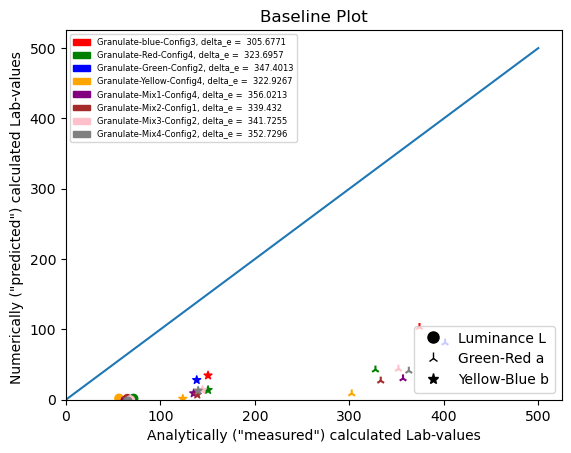

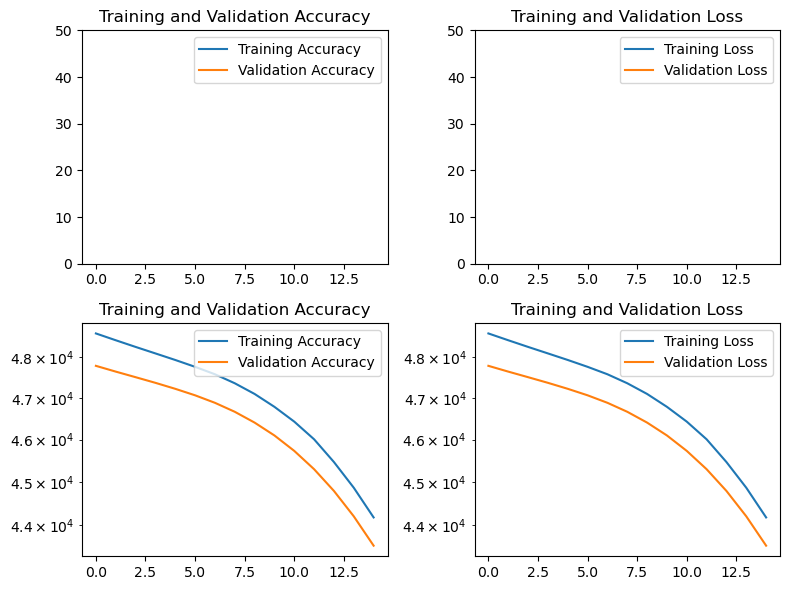

In [14]:
neurons_list = [20]  
#mlflow.start_run()
# Loop through parameter values
existing_df = pd.read_excel('../mlruns/excel_log.xlsx')
counter = 0
for neurons in neurons_list:
    # Start a nested MLflow run for each parameter setting
    with mlflow.start_run(nested=True):

        run = mlflow.active_run()
        # Log the current parameter value
        mlflow.log_param("neurons", neurons)

        # Log hyperparameters
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("learning_rate", learning_rate)

        # Model definition
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(neurons, activation='relu', input_shape=(52,)),
            tf.keras.layers.Dense(neurons, activation='relu', input_shape=(52,)),
            tf.keras.layers.Dense(3)#, activation='softmax')# ohne activation, da kein classifier
        ])
        early_stopping = EarlyStopping(monitor='val_mse',  # the metric to monitor
                               min_delta=0.01,   # minimum change to qualify as an improvement
                               patience=20000,     # number of epochs with no improvement after which training will be stopped
                               verbose=1)       # set to 1 to see messages about early stopping
                            # Save best model 


        # Compile the model
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                      loss='mean_squared_error',
                      metrics=['mse'])
                      #Vielleicht auch mal mit delta e als mse

        # Train the model
        history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])

        # Evaluate the model on the test set
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_squared_error(y_test, y_pred)
        delta_e = ((y_test.iloc[:, 0]-y_pred[:, 0])**2+(y_test.iloc[:, 1]-y_pred[:, 1])**2+(y_test.iloc[:, 2]-y_pred[:, 2])**2)**(1/2)
        

        # Baseline Plot
        fig, ax = plt.subplots()
        # Plot the data
        colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']
        ax.scatter(y_test.iloc[:, 0], y_pred[:, 0], color=colors, marker = 'o', label='Luminance L')
        ax.scatter(y_test.iloc[:, 1], y_pred[:, 1], color=colors, marker = '2', label='Green-Red a')
        ax.scatter(y_test.iloc[:, 2], y_pred[:, 2], color=colors, marker = '*', label='Yellow-Blue b')
        ax.plot([0,500],[0,500])

        legend_elements1 = []
        for count, element_label in enumerate(test_labels):
            #legend_elements1.append(Patch(color=colors[count], label=(element_label+ ', delta_e = '+str(delta_e[count]))))
            legend_elements1.append(Patch(color=colors[count], label=(element_label+', delta_e =  '+str(round(delta_e.values[count], 4)))
                                          ))


        # Create proxy artists for the second legend
        legend_elements2 = [
            plt.Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=8, label='Luminance L'),
            plt.Line2D([0], [0], color='black', marker='2', linestyle='None', markersize=8, label='Green-Red a'),
            plt.Line2D([0], [0], color='black', marker='*', linestyle='None', markersize=8, label='Yellow-Blue b'),
           
        ]

        legend1 = ax.legend(handles=legend_elements1, loc='upper left', fontsize=6)

        # Add the second legend with additional information
        legend2 = ax.legend(handles=legend_elements2, loc='lower right')

        # Add the first legend back to the figure
        ax.add_artist(legend1)
        ax.set_xlim(left=0)
        ax.set_ylim(bottom=0)
        ax.set_ylabel('Numerically ("predicted") calculated Lab-values ')
        ax.set_xlabel('Analytically ("measured") calculated Lab-values')
        ax.set_title('Baseline Plot')

        # Manually adjust the layout to make room for both legends
        #legende mit delta e werten, also blau = granulate 1 ,delta e =3 statt bar chart


        # Learning Curve
        fig2, ax1 = plt.subplots(2, 2, figsize=(8, 6))
        acc = history.history['mse']
        val_acc = history.history['val_mse']

        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs_range = range(len(history.history['mse']))

        ax1[0,0].plot(epochs_range, acc, label='Training Accuracy')
        ax1[0,0].plot(epochs_range, val_acc, label='Validation Accuracy')
        ax1[0,0].legend(loc='upper right')
        ax1[0,0].set_title('Training and Validation Accuracy')

        ax1[0,1].plot(epochs_range, loss, label='Training Loss')
        ax1[0,1].plot(epochs_range, val_loss, label='Validation Loss')
        ax1[0,1].legend(loc='upper right')
        ax1[0,1].set_title('Training and Validation Loss')

        ax1[1,0].semilogy(epochs_range, acc, label='Training Accuracy')
        ax1[1,0].semilogy(epochs_range, val_acc, label='Validation Accuracy')
        ax1[1,0].legend(loc='upper right')
        ax1[1,0].set_title('Training and Validation Accuracy')

        ax1[1,1].semilogy(epochs_range, loss, label='Training Loss')
        ax1[1,1].semilogy(epochs_range, val_loss, label='Validation Loss')
        ax1[1,1].legend(loc='upper right')
        ax1[1,1].set_title('Training and Validation Loss')

        ax1[0,0].set_ylim(top=50, bottom =0)
        ax1[0,1].set_ylim(top=50, bottom =0)
        fig2.tight_layout()
        #loggen:  parameter, 
    

        # Log metrics for the current parameter setting
        mlflow.log_metric("final_mse", mse)
        mlflow.log_metric("final_mae", mae)
        mlflow.log_param("delta_e", delta_e.values)
        mlflow.log_param("y_pred", y_pred)
        #mlflow.log_figure(fig, "experiment"+str(counter)+".png")
        min_value = 10 ** 29  # 1 followed by 29 zeros
        max_value = (10 ** 30) - 1  # 1 followed by 30 nines
        random_float = random.randint(min_value, max_value)
        path = 'mlruns/0/'+str(run.info.run_id)+'/figures'
        #dirlist = os.listdir('C:/Users/lucas/Documents/SKZ-Projekte/FV2015_HSI_Farbrezeptierung/notebooks/mlruns/0/'+str(run.info.run_id))#+str(run.info.run_id))
        os.mkdir(path) 
        #print(dirlist)
        #print(run.info.run_id)
        #os.chdir('C:/Users/lucas/Documents/SKZ-Projekte/FV2015_HSI_Farbrezeptierung/notebooks')
        fig.savefig(path+'/experiment'+'a'+str(random_float)+'.png')
        fig2.savefig(path+'/experiment'+'b'+str(random_float)+'.png')
        #column_names = ['index_id', 'neurons', 'epochs', 'learning_rate', 'actual_epochs', 'final_mse', 'final_mae', 'delta_e', 'y_pred', 'baseline', 'learning_curve']
        new_row = [0, existing_df['index_id'].iloc[-1], neurons, epochs, learning_rate, len(history.history['mse']), mse, mae, delta_e, y_pred, path+'/experiment'+'a'+str(random_float)+'.png', path+'/experiment'+'b'+str(random_float)+'.png']

        new_row_df = pd.DataFrame([new_row], columns=existing_df.columns)
        updated_df = pd.concat([existing_df, new_row_df], ignore_index=True)
        #mlflow.log_figure(fig, 'my_plot.png')
        #mlflow.log_artifacts(fig, path)#path+'experiment'+'_a_'+str(random_float)+'.png')
        #mlflow.log_figure(fig2, path+'experiment'+'_b_'+str(random_float)+'.png')
        counter= counter+1
        # Save the TensorFlow model using MLflow
        #mlflow.tensorflow.save_model(tf_saved_model_dir="tf_model", keras_model=model)

# Close the outer MLflow run
        mlflow.end_run()
updated_df.to_excel('../mlruns/excel_log.xlsx', index=False)

In [15]:
new_row = [0, existing_df['index_id'].iloc[-1], neurons, epochs, learning_rate, len(history.history['mse']), mse, mae, delta_e, y_pred, path+'/experiment'+'a'+str(random_float)+'.png', path+'/experiment'+'b'+str(random_float)+'.png']

In [16]:
len(new_row)

12

In [17]:
delta_e

88     305.677113
94     323.695710
97     347.401300
104    322.926698
109    356.021343
111    339.431986
117    341.725540
122    352.729592
dtype: float64

In [18]:
y_test.iloc[:, 1]

88     374.260410
94     327.646305
97     401.335604
104    302.519856
109    356.822551
111    333.238872
117    351.994034
122    362.966493
Name: Green-Red a, dtype: float64